In [7]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\Downloads\archive\DataScience_salaries_2025_processed.csv")
df.head()  # Display the first few rows of the DataFrame


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_location,company_location,company_size,job_category,skills_required,continent,salary_in_usd_static,country_iso3
0,2025,Mid Level,Full-time,Research Scientist,208000,USD,208000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,208000.0,USA
1,2025,Mid Level,Full-time,Research Scientist,147000,USD,147000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,147000.0,USA
2,2025,Senior Level,Full-time,Research Scientist,173000,USD,173000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,173000.0,USA
3,2025,Senior Level,Full-time,Research Scientist,117000,USD,117000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,117000.0,USA
4,2025,Mid Level,Full-time,AI Engineer,100000,USD,100000,US,Remote,US,Medium,Core AI/ML,"Python, TensorFlow, PyTorch, Scikit-learn, MLf...",North America,100000.0,USA


In [8]:
df.info()  # Display information about the DataFrame, including data types and non-null counts
df.describe()  # Display summary statistics for numerical columns
df.isnull().sum()  # Check for missing values in each column
df.count()  # Count the number of non-null entries in each column
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   work_year             93597 non-null  int64  
 1   experience_level      93597 non-null  object 
 2   employment_type       93597 non-null  object 
 3   job_title             93597 non-null  object 
 4   salary                93597 non-null  int64  
 5   salary_currency       93597 non-null  object 
 6   salary_in_usd         93597 non-null  int64  
 7   employee_residence    93597 non-null  object 
 8   work_location         93597 non-null  object 
 9   company_location      93597 non-null  object 
 10  company_size          93597 non-null  object 
 11  job_category          93597 non-null  object 
 12  skills_required       93597 non-null  object 
 13  continent             93597 non-null  object 
 14  salary_in_usd_static  93597 non-null  float64
 15  country_iso3       

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_location,company_location,company_size,job_category,skills_required,continent,salary_in_usd_static,country_iso3
0,2025,Mid Level,Full-time,Research Scientist,208000,USD,208000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,208000.0,USA
1,2025,Mid Level,Full-time,Research Scientist,147000,USD,147000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,147000.0,USA
2,2025,Senior Level,Full-time,Research Scientist,173000,USD,173000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,173000.0,USA
3,2025,Senior Level,Full-time,Research Scientist,117000,USD,117000,US,On-site,US,Medium,Quant / Research,"Python, R, MATLAB, Stata, SQL, Statistics, Eco...",North America,117000.0,USA
4,2025,Mid Level,Full-time,AI Engineer,100000,USD,100000,US,Remote,US,Medium,Core AI/ML,"Python, TensorFlow, PyTorch, Scikit-learn, MLf...",North America,100000.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93592,2020,Senior Level,Full-time,Data Scientist,412000,USD,412000,US,Remote,US,Large,Core Data Science,"Python, R, SQL, Pandas, Scikit-learn, Data Ana...",North America,412000.0,USA
93593,2021,Mid Level,Full-time,Principal Data Scientist,151000,USD,151000,US,Remote,US,Large,Core Data Science,"Python, R, SQL, Pandas, Scikit-learn, Data Ana...",North America,151000.0,USA
93594,2020,Entry Level,Full-time,Data Scientist,105000,USD,105000,US,Remote,US,Small,Core Data Science,"Python, R, SQL, Pandas, Scikit-learn, Data Ana...",North America,105000.0,USA
93595,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,US,Remote,US,Large,Analyst / BI,"SQL, Excel, Power BI, Tableau, Looker, Data Cl...",North America,100000.0,USA


In [9]:
import pandas as pd

df = df.copy()


# Step 1: Clean salary outliers
Q1 = df['salary_in_usd_static'].quantile(0.25)
Q3 = df['salary_in_usd_static'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['salary_in_usd_static'] >= Q1 - 1.5 * IQR) & (df['salary_in_usd_static'] <= Q3 + 1.5 * IQR)]

# Step 2: Create salary category (for classification)
df['salary_category'] = pd.qcut(df['salary_in_usd_static'], q=3, labels=['Low', 'Medium', 'High'])

# Step 3: Map country codes to continents
continent_map = {
    'US': 'North America', 'CA': 'North America', 'MX': 'North America',
    'DE': 'Europe', 'FR': 'Europe', 'GB': 'Europe', 'ES': 'Europe', 'NL': 'Europe', 'IT': 'Europe',
    'IN': 'Asia', 'CN': 'Asia', 'JP': 'Asia', 'SG': 'Asia',
    'AU': 'Oceania', 'NZ': 'Oceania',
    'BR': 'South America', 'AR': 'South America',
    'ZA': 'Africa', 'NG': 'Africa'
}

df['employee_continent'] = df['employee_residence'].map(continent_map).fillna('Other')
df['company_continent'] = df['company_location'].map(continent_map).fillna('Other')

# Step 4: Group job titles
def map_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'engineer' in title:
        return 'Engineer'
    elif 'manager' in title:
        return 'Manager'
    elif 'developer' in title or 'software' in title:
        return 'Developer'
    elif 'architect' in title:
        return 'Architect'
    elif 'machine learning' in title or 'ml' in title:
        return 'ML Engineer'
    elif 'research' in title:
        return 'Researcher'
    elif 'director' in title:
        return 'Director'
    else:
        return 'Other'

df['job_category'] = df['job_title'].apply(map_job_title)

# Step 5: Drop now-unneeded original columns
df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'company_location', 'job_title'], inplace=True)

# Step 6: Encode all object (categorical) columns
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Continue with model training...


In [10]:
df

,work_year,experience_level,employment_type,salary_in_usd,work_location,company_size,job_category,skills_required,continent,salary_in_usd_static,country_iso3,salary_category,employee_continent,company_continent
0,2025,2,2,208000,1,1,9,5,3,208000.0,84,High,3,3
1,2025,2,2,147000,1,1,9,5,3,147000.0,84,Medium,3,3
2,2025,3,2,173000,1,1,9,5,3,173000.0,84,Medium,3,3
3,2025,3,2,117000,1,1,9,5,3,117000.0,84,Low,3,3
4,2025,2,2,100000,2,1,5,8,3,100000.0,84,Low,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93591,2021,3,2,165000,2,0,8,2,3,165000.0,84,Medium,3,3
93593,2021,2,2,151000,2,0,2,6,3,151000.0,84,Medium,3,3
93594,2020,0,2,105000,2,2,2,6,3,105000.0,84,Low,3,3
93595,2020,0,0,100000,2,0,1,11,3,100000.0,84,Low,3,3


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb




# Encode salary category (target)
le_salary = LabelEncoder()
y = le_salary.fit_transform(df['salary_category'])  # Fixes the XGBoost error


# Define features and target
X = df.drop(columns=['salary_in_usd_static', 'salary_category','salary_in_usd'])  # optional to keep salary_in_usd as feature


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build models fresh each time
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB()
    }

# Train and evaluate each model freshly
for name, model in get_models().items():  # fresh model each time
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Accuracy: 0.4817625859997816
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.64      0.53      5977
           1       0.57      0.56      0.56      6113
           2       0.41      0.26      0.31      6224

    accuracy                           0.48     18314
   macro avg       0.48      0.48      0.47     18314
weighted avg       0.48      0.48      0.47     18314

Confusion Matrix:
 [[3826 1009 1142]
 [1521 3401 1191]
 [3024 1604 1596]]

--- Decision Tree ---
Accuracy: 0.5281205635033308
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59      5977
           1       0.63      0.63      0.63      6113
           2       0.43      0.26      0.32      6224

    accuracy                           0.53     18314
   macro avg       0.52      0.53      0.51     18314
weighted avg       0.52      0.53      0.51     18314

Confus

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
Accuracy: 0.5317243638746314
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.70      0.59      5977
           1       0.62      0.65      0.63      6113
           2       0.43      0.26      0.32      6224

    accuracy                           0.53     18314
   macro avg       0.52      0.53      0.52     18314
weighted avg       0.52      0.53      0.51     18314

Confusion Matrix:
 [[4169  744 1064]
 [1086 3964 1063]
 [2947 1672 1605]]

--- KNN ---
Accuracy: 0.4977066724909905
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.70      0.56      5977
           1       0.62      0.57      0.59      6113
           2       0.40      0.23      0.29      6224

    accuracy                           0.50     18314
   macro avg       0.49      0.50      0.48     18314
weighted avg       0.49      0.50      0.48     18314

Confusion Matrix:
 [[4210  6

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5977
           1       0.68      0.19      0.29      6113
           2       0.35      0.95      0.52      6224

    accuracy                           0.38     18314
   macro avg       0.35      0.38      0.27     18314
weighted avg       0.35      0.38      0.27     18314

Confusion Matrix:
 [[   0  198 5779]
 [   0 1148 4965]
 [   0  338 5886]]

--- Naive Bayes ---
Accuracy: 0.4010046958610899
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.94      0.54      5977
           1       0.71      0.22      0.34      6113
           2       0.23      0.06      0.09      6224

    accuracy                           0.40     18314
   macro avg       0.44      0.41      0.32     18314
weighted avg       0.44      0.40      0.32     18314

Confusion Matrix:
 [[5622  208  147]
 [3695 1366 1052]
 [5505  363

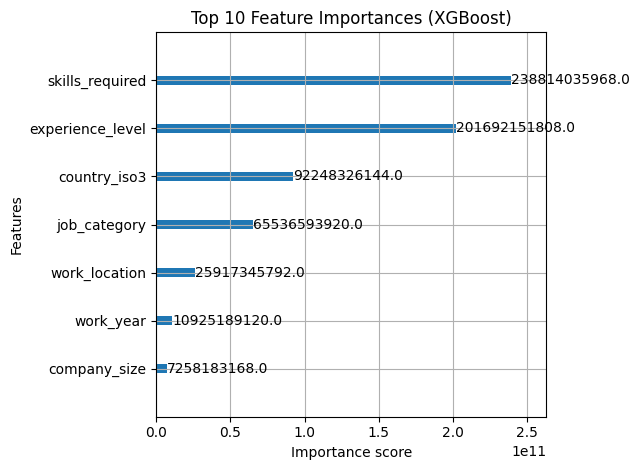

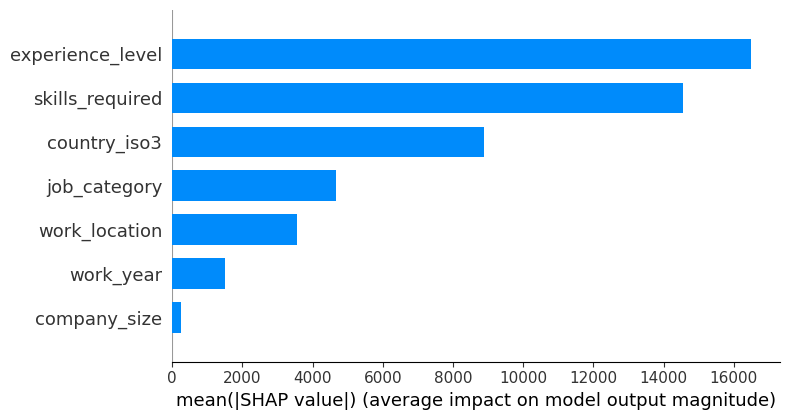

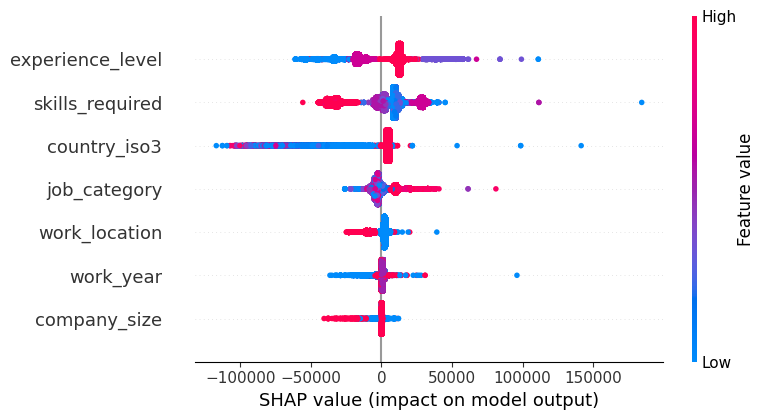

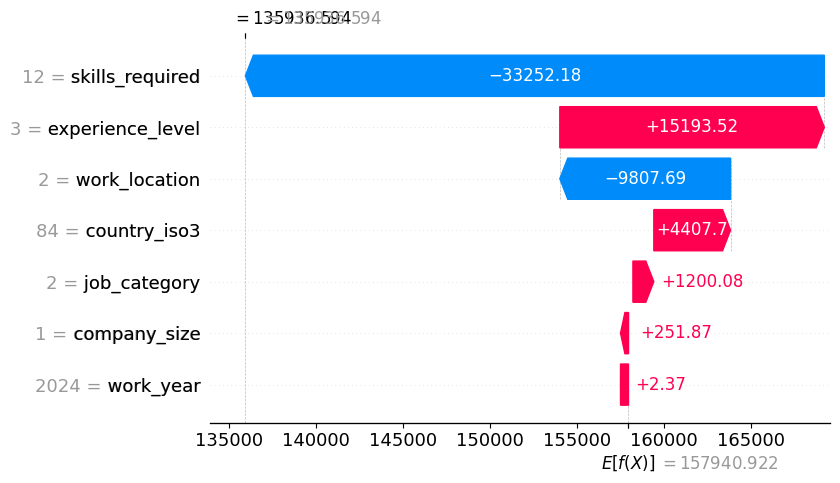

In [41]:
!pip install xgboost shap scikit-learn matplotlib pandas
!pip install numpy==2.2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import XGBRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#5. Train XGBoost Regressor
# =============================
# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# =============================
# 6. Plot Feature Importance
# =============================
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# =============================
# 7. SHAP Explanation
# =============================
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# SHAP Summary Plot (Bar)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# SHAP Summary Plot (Detailed)
shap.summary_plot(shap_values, X_train)

# Optional: Explain single prediction
shap.plots.waterfall(shap_values[0])

In [42]:


# Step 6: Encode all object (categorical) columns
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# Now X_numeric is fully numeric and safe to use in SHAP, XGBoost, etc.
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_location,company_location,company_size,job_category,skills_required,continent,salary_in_usd_static,country_iso3
0,2025,2,2,282,208000,24,208000,89,1,84,1,10,5,3,208000.0,84
1,2025,2,2,282,147000,24,147000,89,1,84,1,10,5,3,147000.0,84
2,2025,3,2,282,173000,24,173000,89,1,84,1,10,5,3,173000.0,84
3,2025,3,2,282,117000,24,117000,89,1,84,1,10,5,3,117000.0,84
4,2025,2,2,4,100000,24,100000,89,2,84,1,3,8,3,100000.0,84


Mean Absolute Error: 46913.87903170489
R² Score: 0.23657840739690006


100%|===================| 18703/18720 [04:59<00:00]        

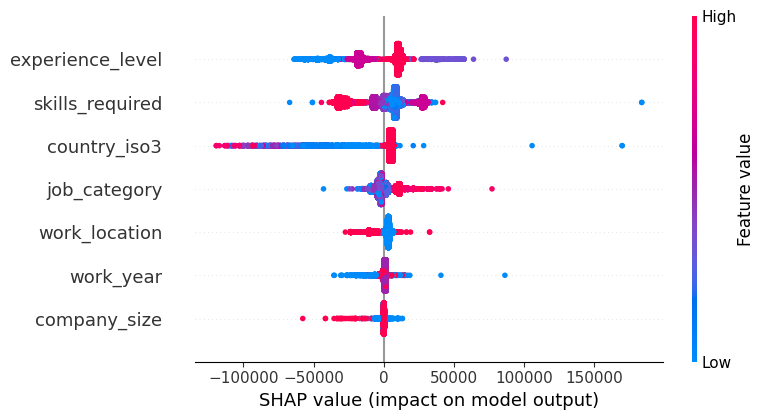

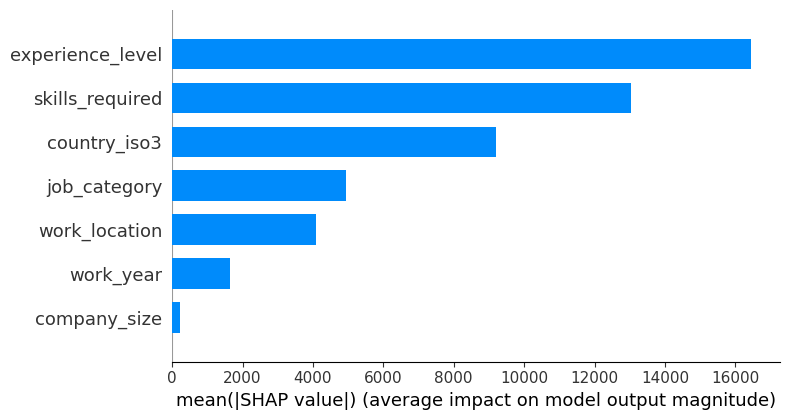

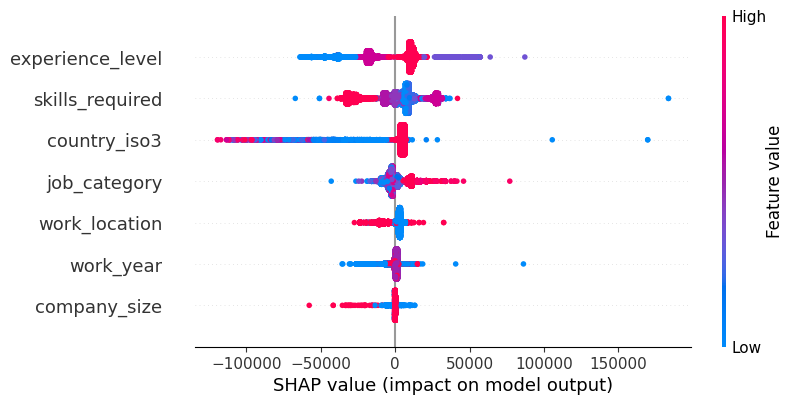

In [43]:
# Required libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import shap
import matplotlib.pyplot as plt



# Select relevant features based on SHAP and XGBoost
features = ['skills_required', 'experience_level', 'job_category', 'work_location',
            'work_year', 'country_iso3', 'company_size']
target = 'salary_in_usd_static'  # Make sure your target column name matches

# Use your processed DataFrame (df or df_encoded)
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

# Bar Plot of average importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.plots.beeswarm(shap_values, max_display=10)

# Optional: force plot for a specific prediction
# shap.plots.waterfall(shap_values[0])


21:51:38 - cmdstanpy - INFO - Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


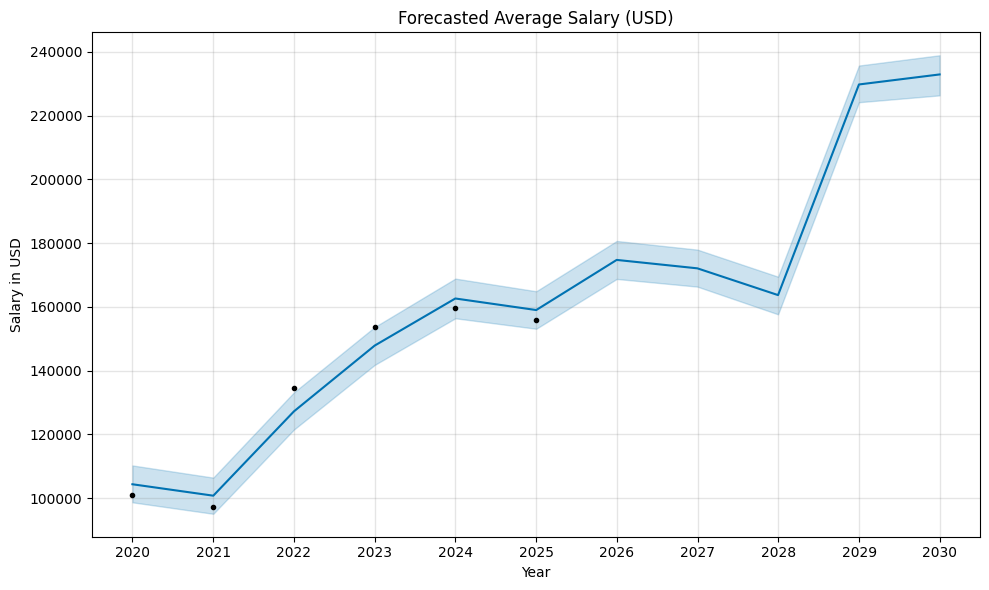

In [44]:
!pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# Step 1: Aggregate salary by year
df_grouped = df.groupby('work_year')['salary_in_usd_static'].mean().reset_index()

# Step 2: Rename for Prophet
df_grouped.columns = ['ds', 'y']
df_grouped['ds'] = pd.to_datetime(df_grouped['ds'], format='%Y')  # Convert to datetime

# Step 3: Initialize and fit the model
model = Prophet()
model.fit(df_grouped)

# Step 4: Create future dataframe (e.g., 5 years ahead)
future = model.make_future_dataframe(periods=5, freq='Y')

# Step 5: Predict
forecast = model.predict(future)

# Step 6: Plot
fig = model.plot(forecast)
plt.title("Forecasted Average Salary (USD)")
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()


In [48]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_location,company_location,company_size,job_category,skills_required,continent,salary_in_usd_static,country_iso3
0,2025,2,2,282,208000,24,208000,89,1,84,1,10,5,3,208000.0,84
1,2025,2,2,282,147000,24,147000,89,1,84,1,10,5,3,147000.0,84
2,2025,3,2,282,173000,24,173000,89,1,84,1,10,5,3,173000.0,84
3,2025,3,2,282,117000,24,117000,89,1,84,1,10,5,3,117000.0,84
4,2025,2,2,4,100000,24,100000,89,2,84,1,3,8,3,100000.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93592,2020,3,2,152,412000,24,412000,89,2,84,0,4,6,3,412000.0,84
93593,2021,2,2,259,151000,24,151000,89,2,84,0,4,6,3,151000.0,84
93594,2020,0,2,152,105000,24,105000,89,2,84,2,4,6,3,105000.0,84
93595,2020,0,0,59,100000,24,100000,89,2,84,0,0,11,3,100000.0,84
